In [84]:
import os
import shutil
import pandas as pd
from json import load
import json as js
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
%matplotlib inline  




In [85]:
def AvgLoadProfile(data,usetype,energytype):
    loadprofiles = []
    rawdata = js.loads(open(data).read())
    for n in rawdata.get("features"):
        feature = n.get("properties")
        if usetype == feature.get("UseType"):
            year = feature.get(energytype)
            days = list(split_list(year,24))
            loadprofile = sum(map(np.array, days))
            loadprofiles.append(loadprofile)
    return loadprofiles


def WinterLoadProfile(data,usetype,energytype):
    loadprofiles = []
    rawdata = js.loads(open(data).read())
    for n in rawdata.get("features"):
        feature = n.get("properties")
        if usetype == feature.get("UseType"):
            year = feature.get(energytype)
            days = zip(*(iter(year),) * 24)
            days = days[356:365] + days[0:80]
            loadprofile = sum(map(np.array, days))
            loadprofiles.append(loadprofile)
    return loadprofiles

def SummerLoadProfile(data,usetype,energytype):
    loadprofiles = []
    rawdata = js.loads(open(data).read())
    for n in rawdata.get("features"):
        feature = n.get("properties")
        if usetype == feature.get("UseType"):
            year = feature.get(energytype)
            days = zip(*(iter(year),) * 24)
            days = days[172:266]
            loadprofile = sum(map(np.array, days))
            loadprofiles.append(loadprofile)
    return loadprofiles

def LoadProfile(data,energytype):
    loadprofiles=[]
    rawdata = js.loads(open(data).read())
    for n in rawdata.get("features"):
        feature = n.get("properties")
        energy = feature.get(energytype)
        days = zip(*(iter(energy),) * 24)
        days = days[356:365] + days[0:80]
        loadprofile = sum(map(np.array, days))
        loadprofiles.append(loadprofile)
    return loadprofiles

6749.5607738


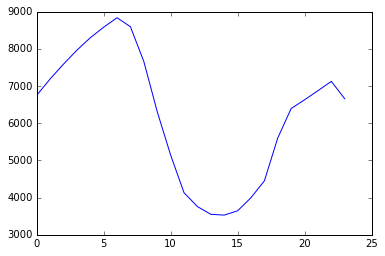

In [86]:
json = "project.json"

loads = WinterLoadProfile(json,"Residential and Lodging","OETotal")
#loads = sum(map(np.array, loads))
loads = loads[0]

data = pd.DataFrame(loads)
#data = data.transpose()
plt.plot(data)
print loads[0]

In [107]:
LoadProfile(json,"OETotal")


lineweights = []
rawdata = js.loads(open(json).read())
usetypes = []
for n in rawdata.get("features"):
    feature = n.get("properties")
    usetype = feature.get("UseType")
    usetypes.append(usetype)
for i in usetypes:
    if i == "Residential and Lodging":
        lineweights.append(3.5)
    if i == "Office Spaces":
        lineweights.append(2)
    if i == "Retail":
        lineweights.append(1)
    if i == "Mixed use":
        lineweights.append(2.5)



In [108]:
with open(json) as data_file:
    geodata = load(data_file)

geodata = geodata["features"]

coordinate = []
coordinates = []

for i in range(0, 225):
    if len (geodata[i]['geometry']["coordinates"])>0:
        for j in range(0,len(geodata[i]['geometry']["coordinates"][0][0])):
            coordinate.append(tuple(geodata[i]['geometry']["coordinates"][0][0][j]))
        coordinates.append(coordinate)
        coordinate = []
    else:
        coordinates.append("null")



codes = []
for i in range(0,len(coordinates)):
    code = [1]
    for j in range(2,len(coordinates[i])):
        code.append(2)
    code.append(79)
    codes.append(code)
    code = [1]



IndexError: index 24 is out of bounds for axis 0 with size 24

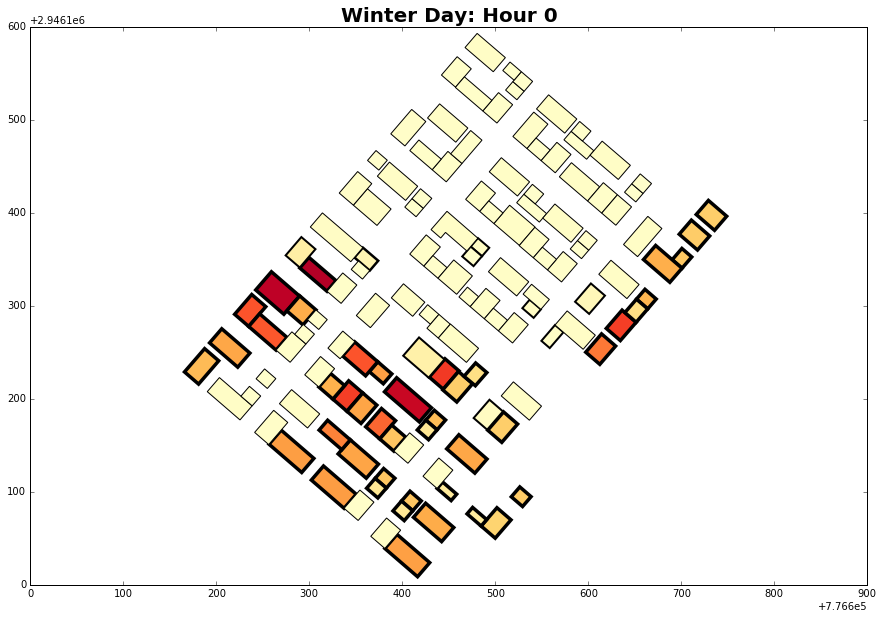

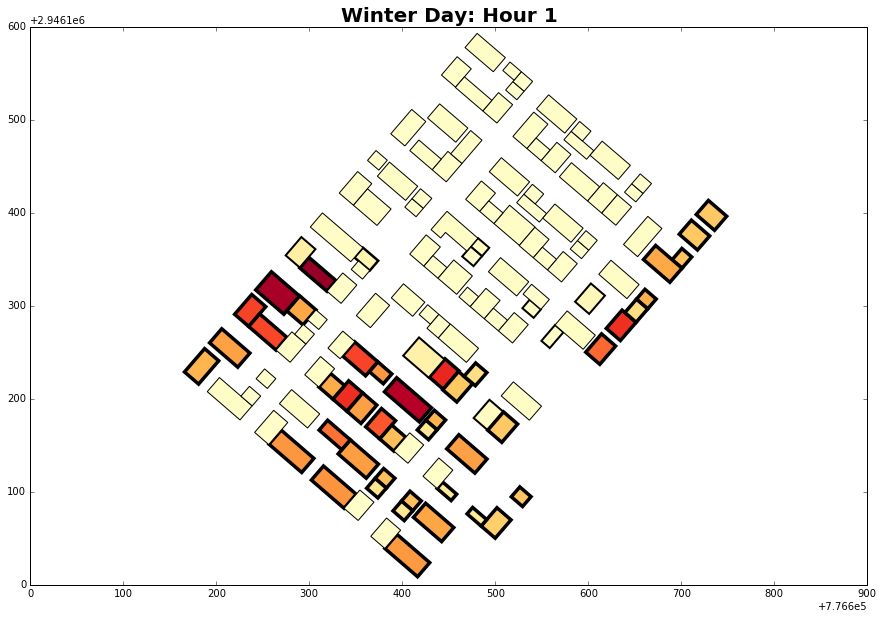

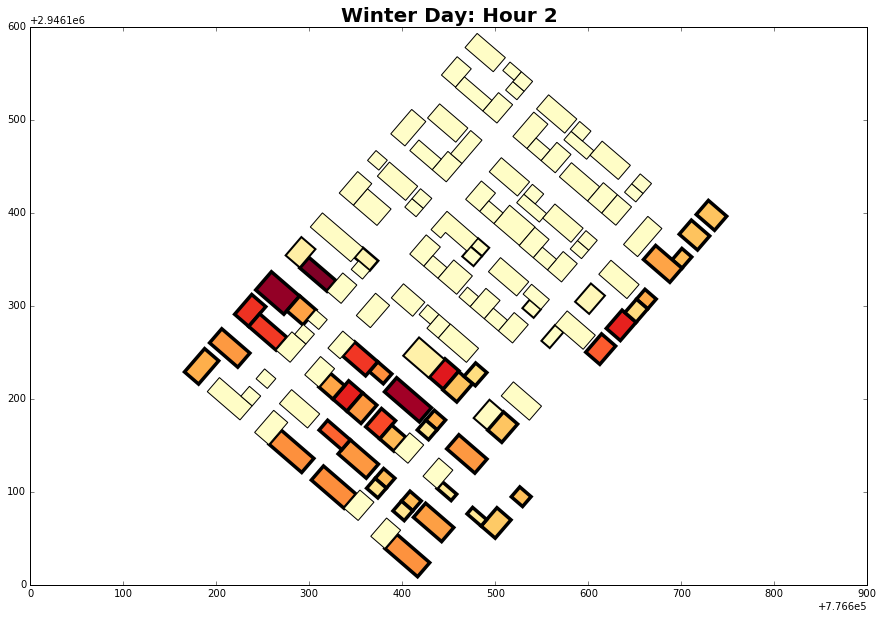

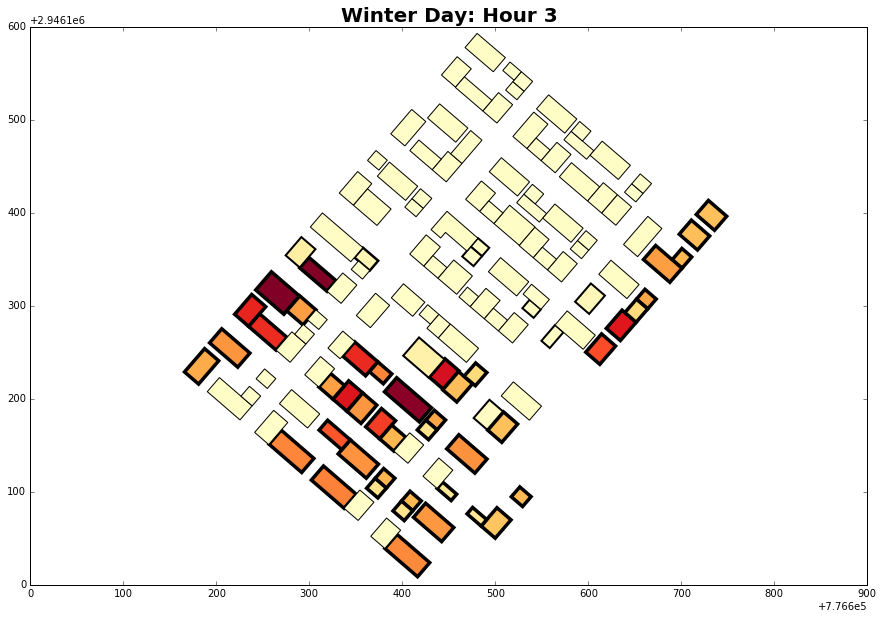

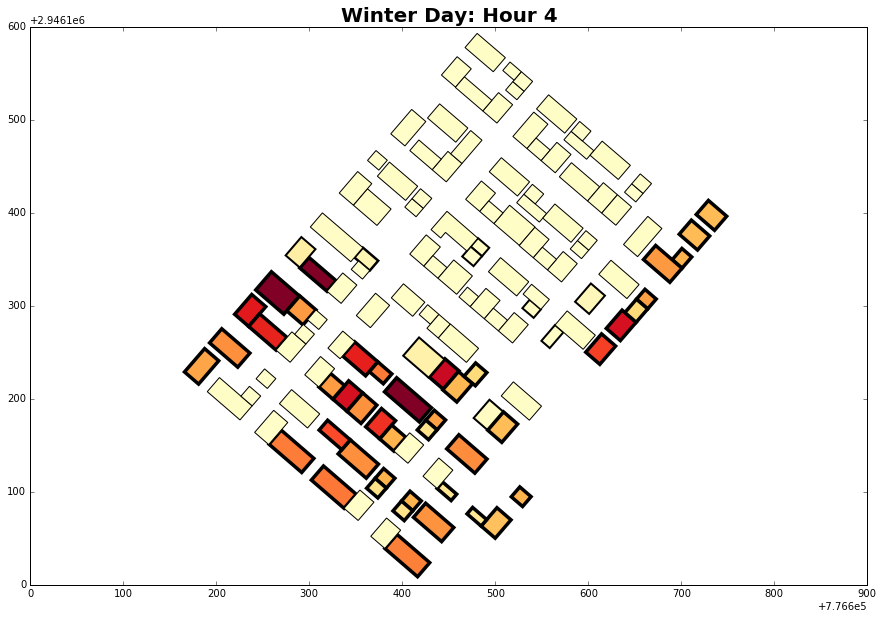

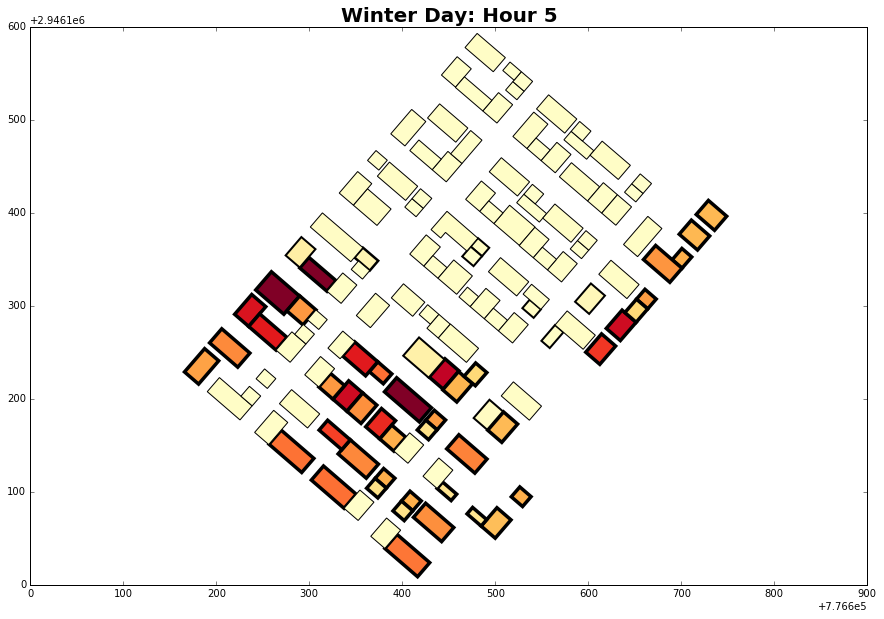

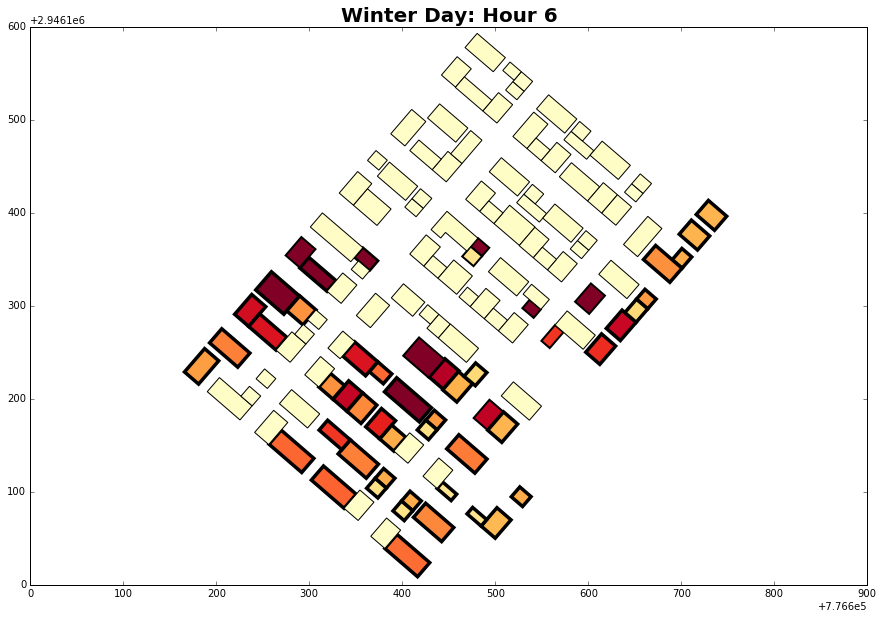

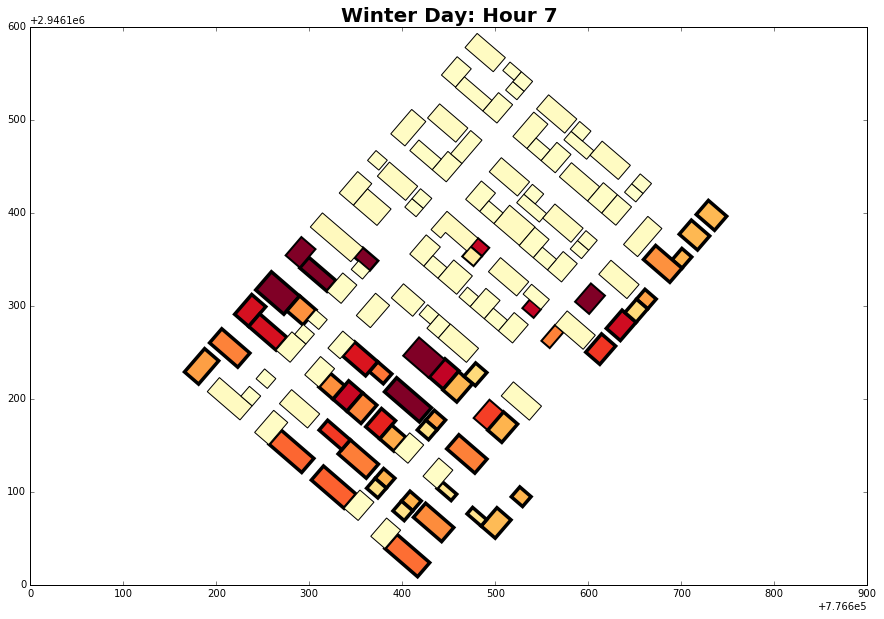

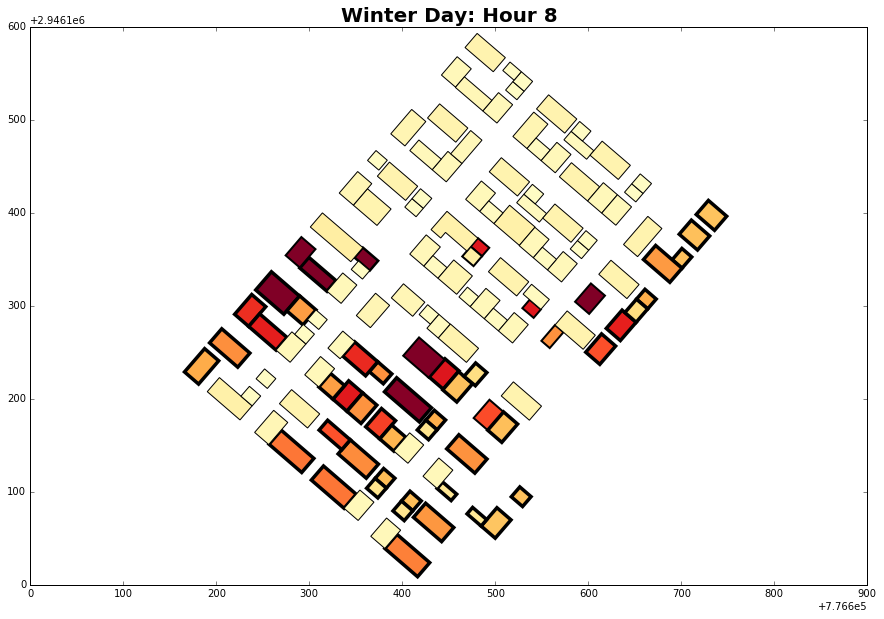

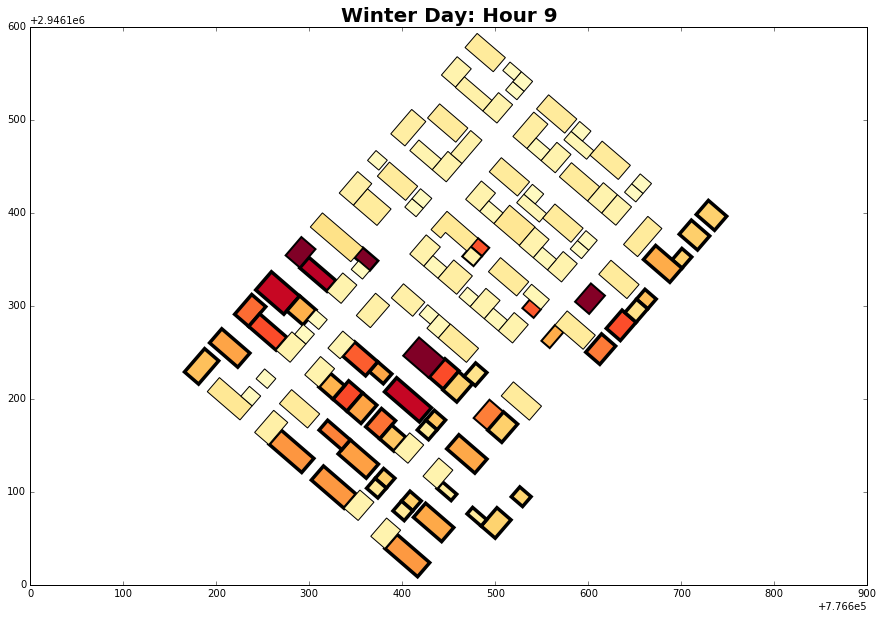

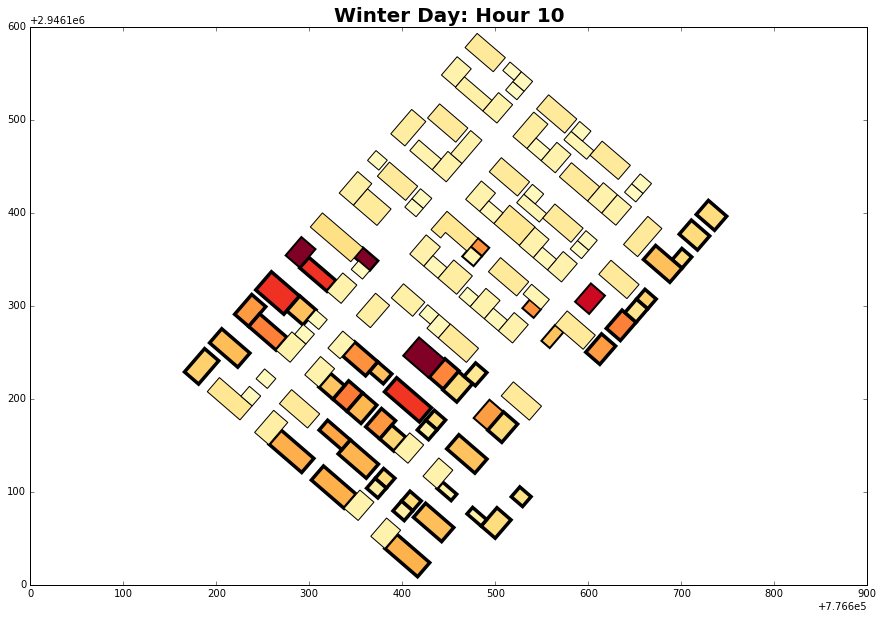

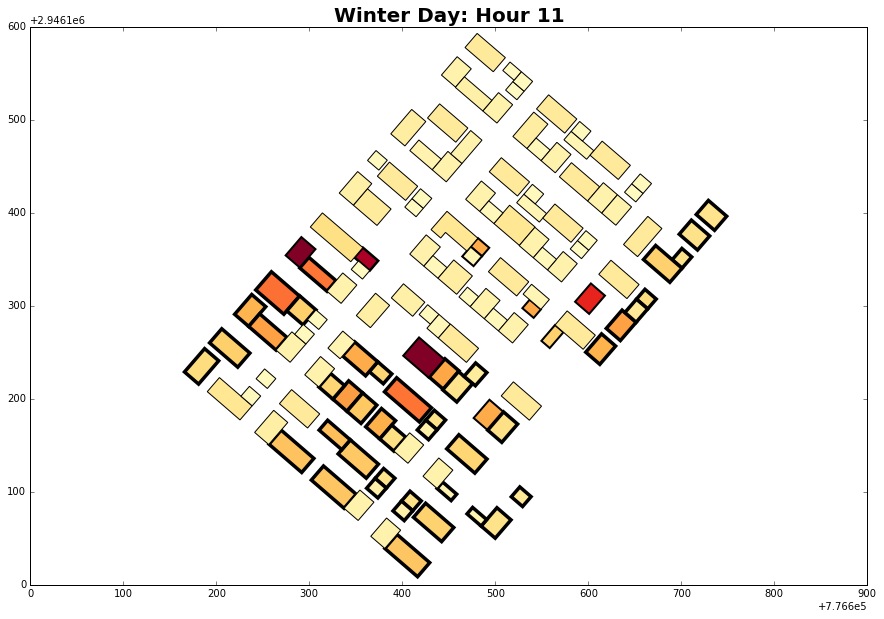

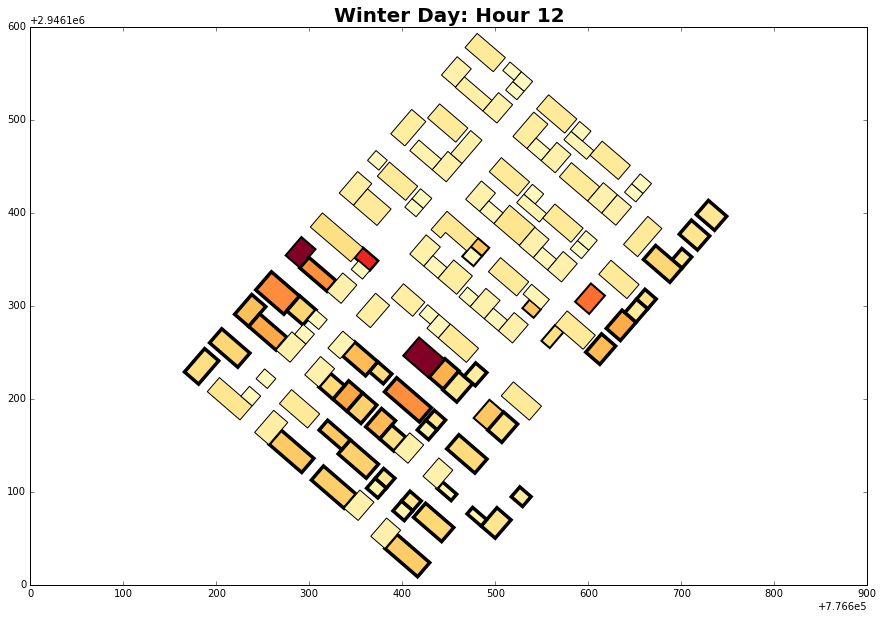

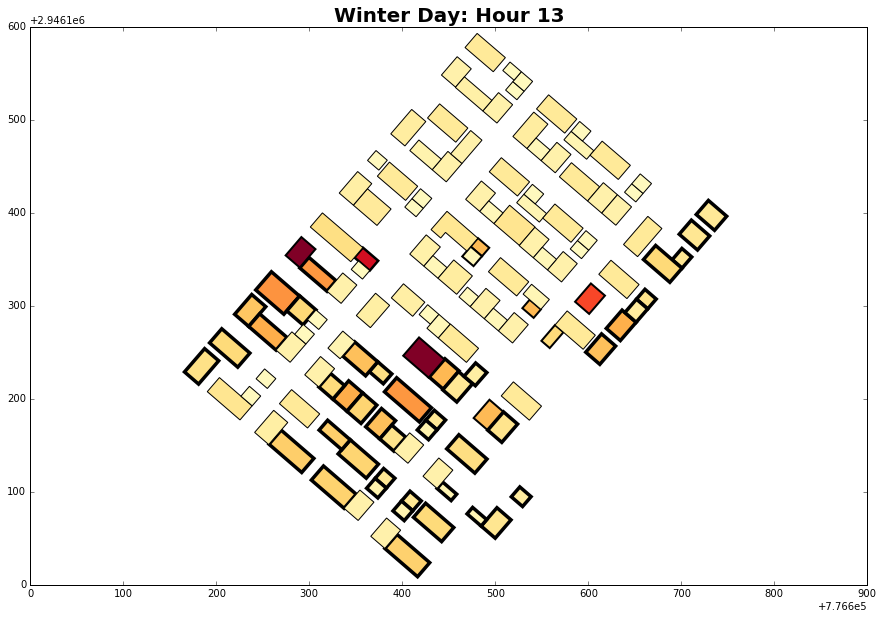

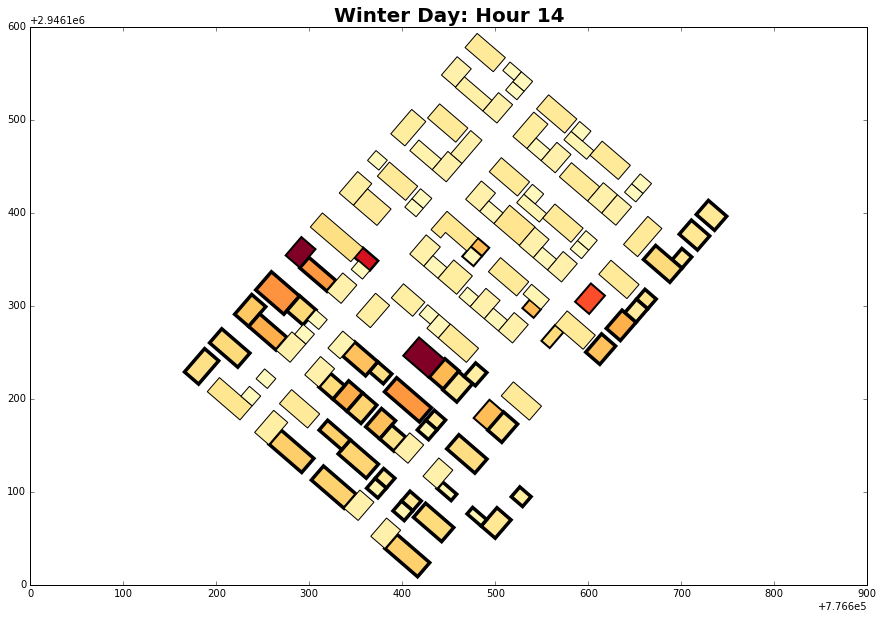

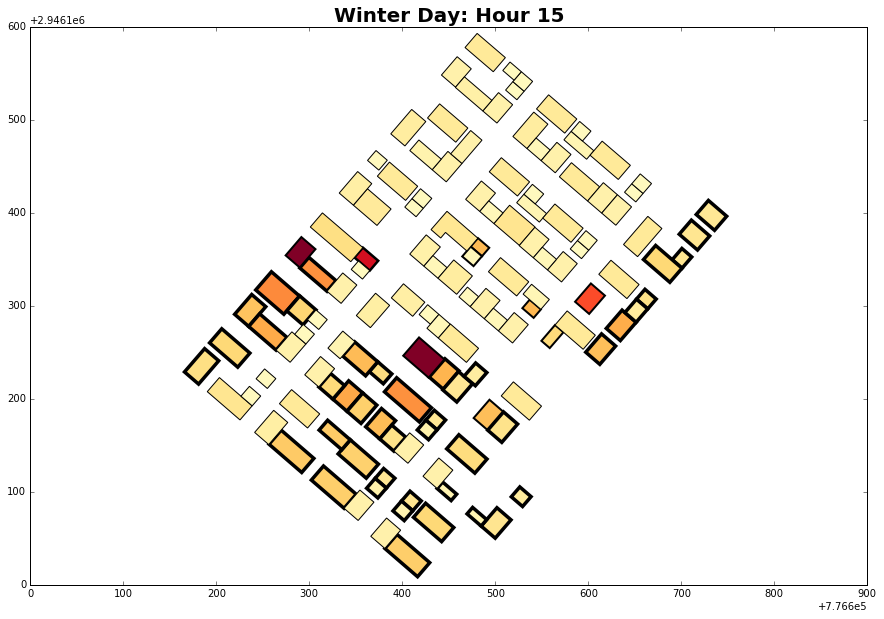

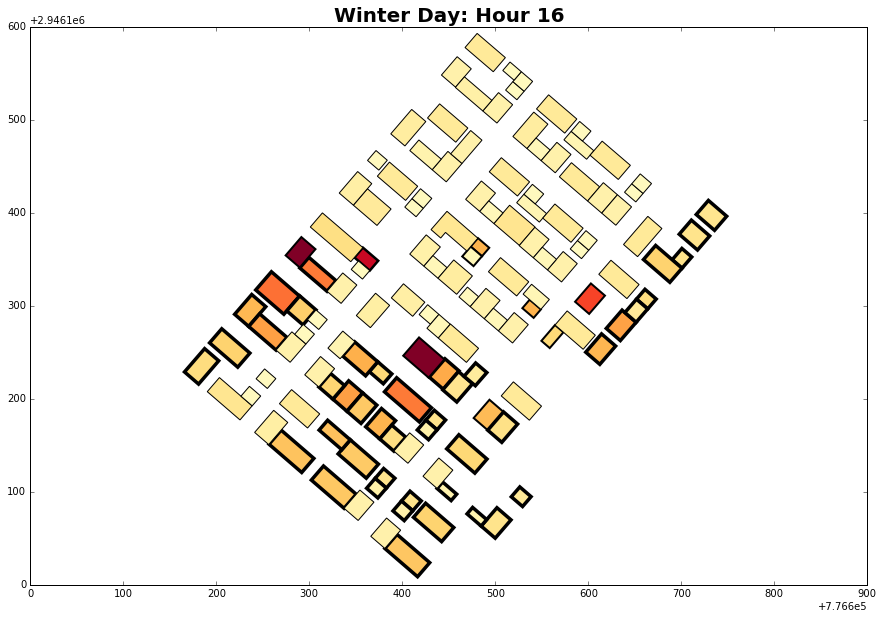

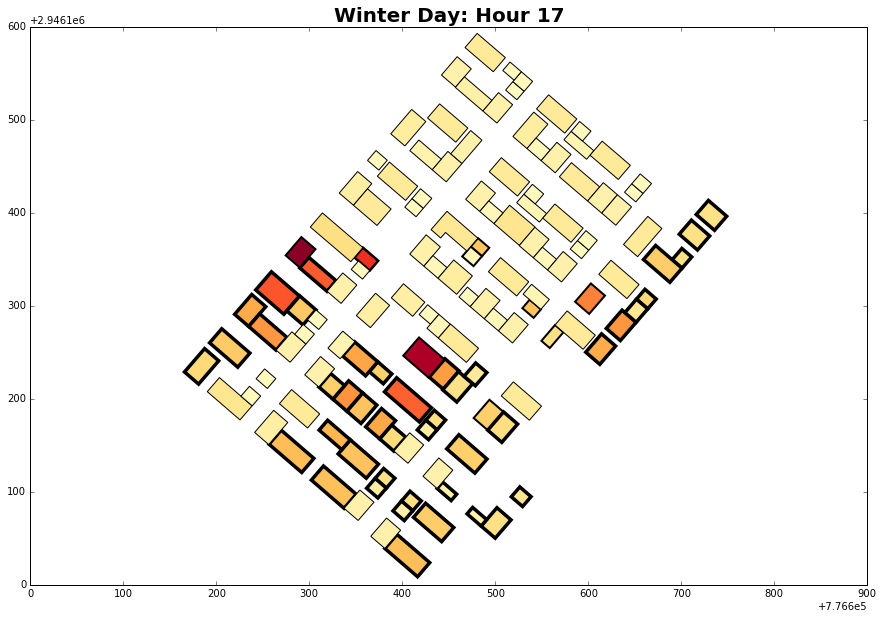

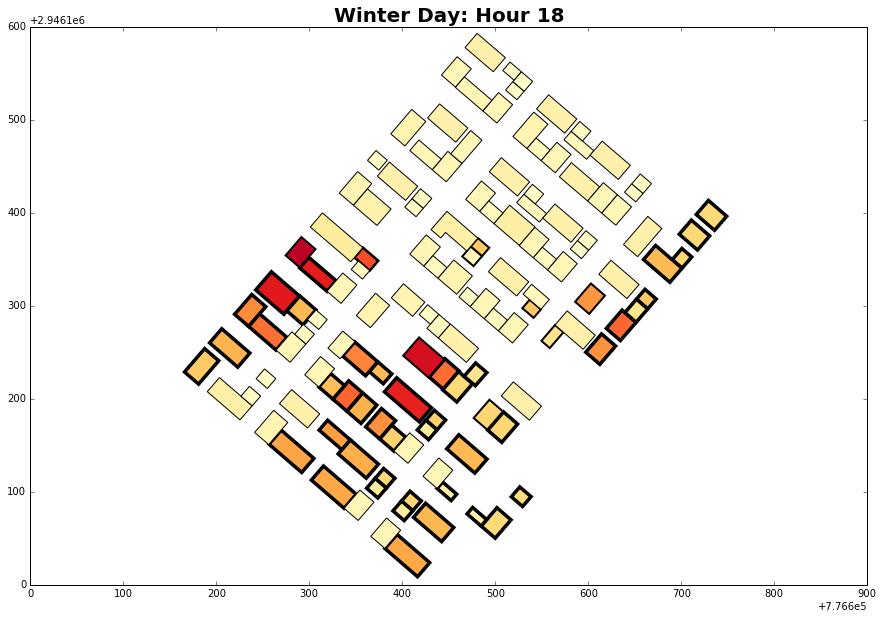

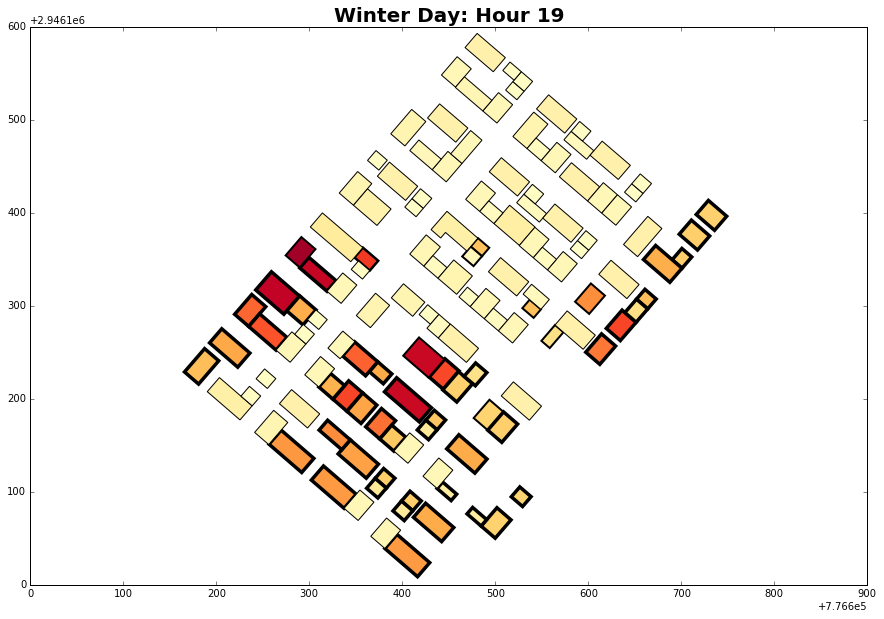

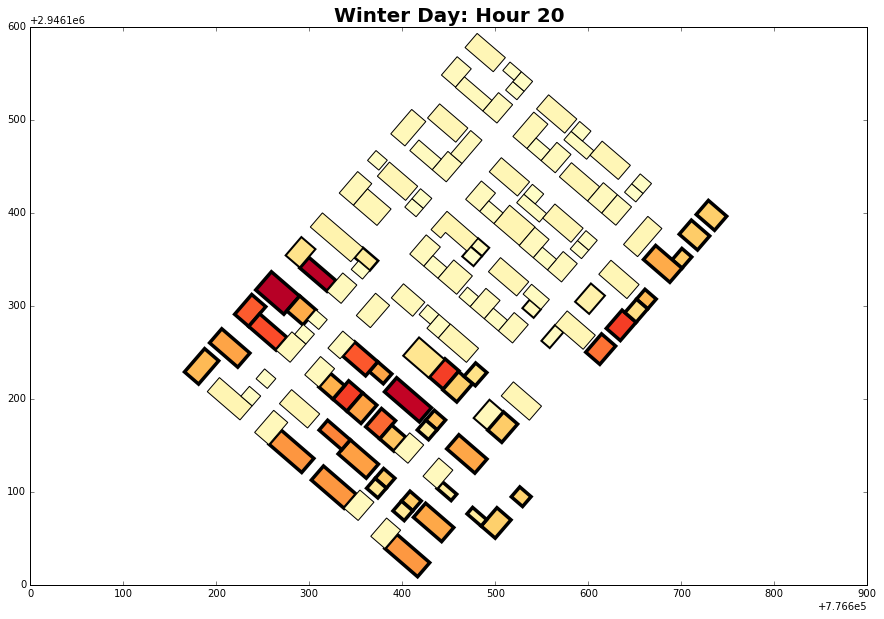

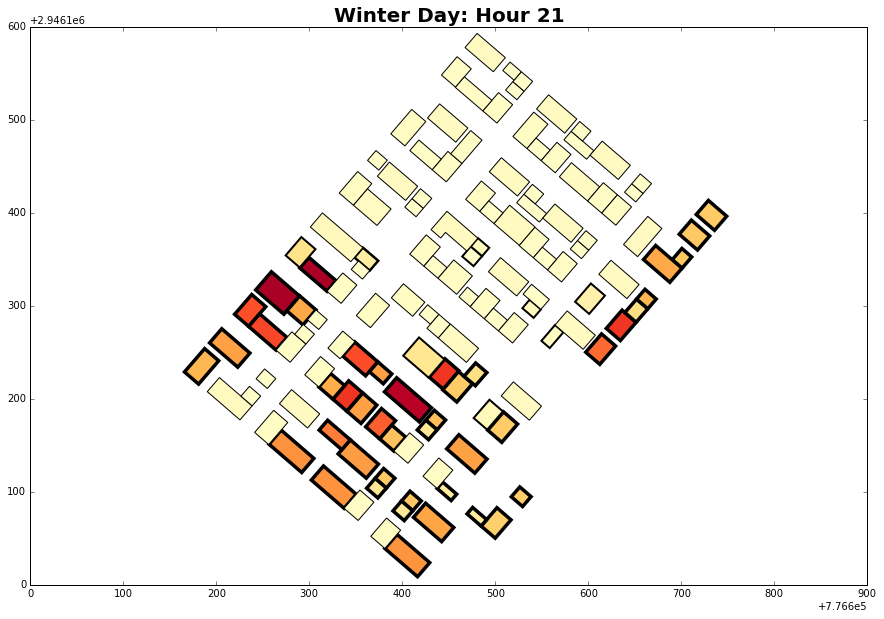

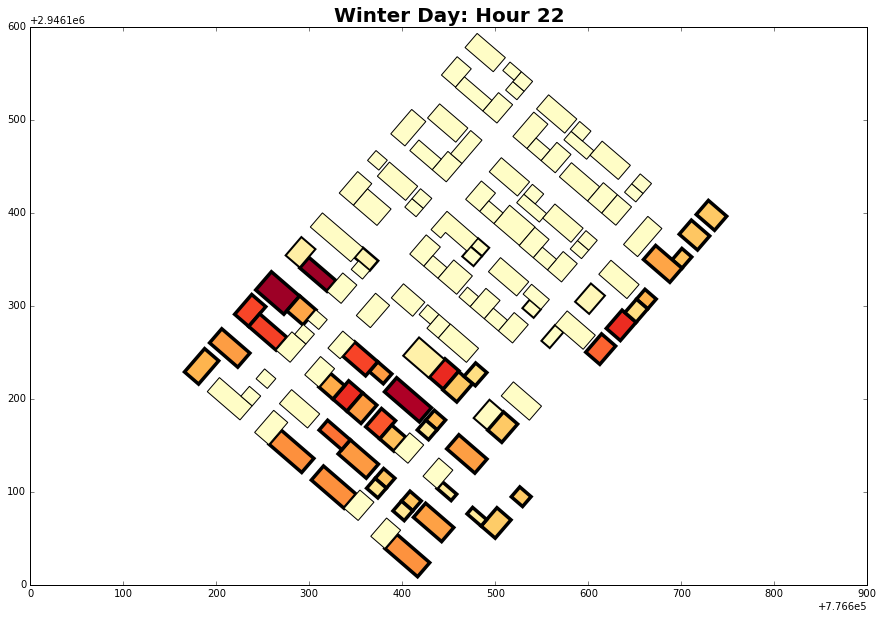

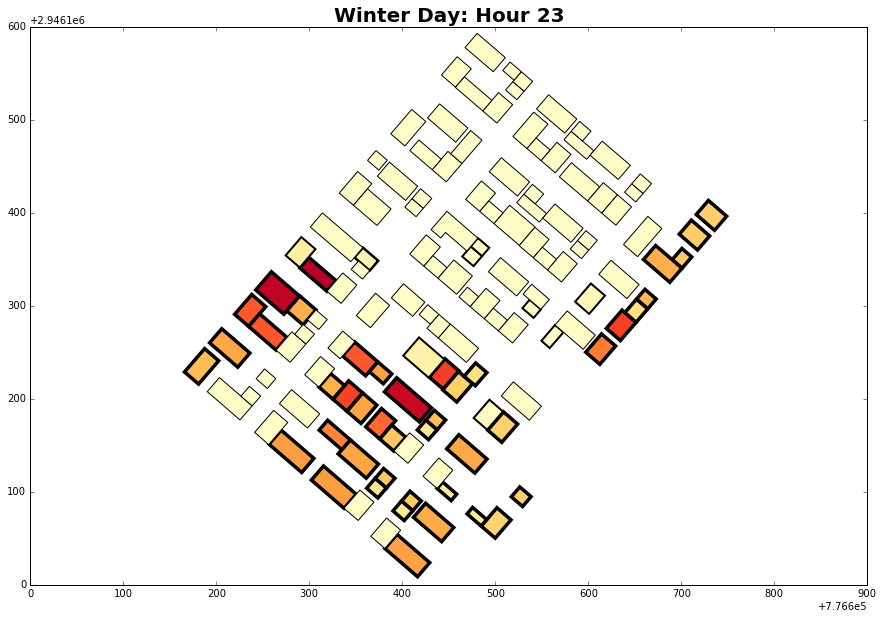

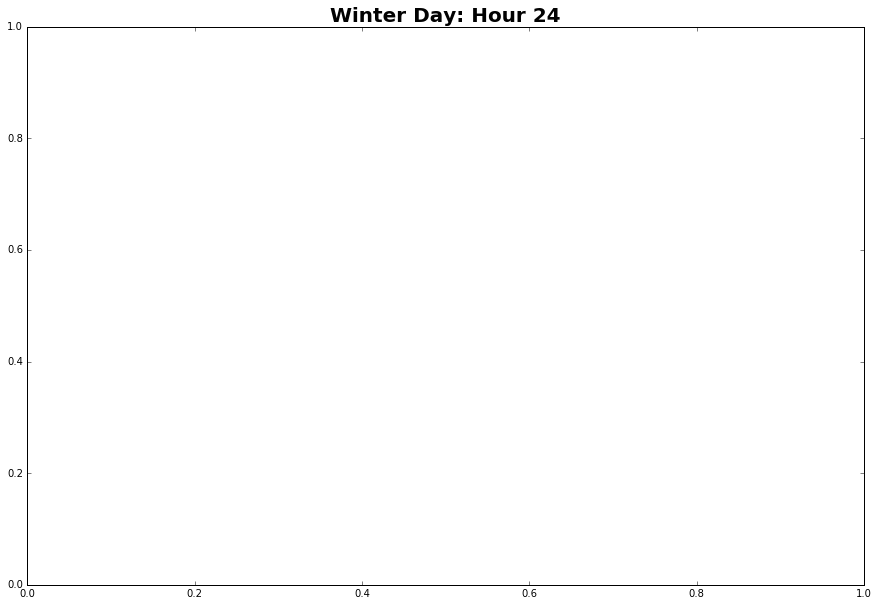

In [132]:
verts = coordinates

cmap = plt.cm.get_cmap('YlOrRd')


def MakeChart(hour):
    fig = plt.figure(num=None, figsize=(15, 10), dpi=150, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_title('Winter Day: Hour '+str(hour), fontsize=20, fontweight='bold')
    for i in range(0,len(codes)):
        if coordinates[i] != "null":
            path = Path(verts[i], codes[i])
            color = np.random.random(10)
            patch = patches.PathPatch(path, facecolor = cmap((loadprofiles[i][hour])/10000), lw = lineweights[i])
            ax.add_patch(patch)
    ax.autoscale_view()
    plt.axes().set_aspect('equal', 'datalim')

#ax.xaxis.set_major_locator(plt.NullLocator())
#ax.yaxis.set_major_locator(plt.NullLocator())
#ax.set_xlim([-1000, 1000])
#ax.set_ylim([-1000, 1000])

for i in range(0,25):
    MakeChart(i)
    plt.savefig(str(i)+'.png', bbox_inches='tight')
